In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")


In [10]:
df = pd.read_csv("Housing.csv")

In [11]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0    13300000  7420         4          2        3      yes        no       no  \
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [12]:
df.head


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0    13300000  7420         4          2        3      yes        no       no  \
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [13]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
390,3500000,2135,3,2,2,no,no,no,no,no,0,no,unfurnished
336,3920000,8080,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
61,7070000,8880,2,1,1,yes,no,no,no,yes,1,no,semi-furnished
167,5285000,4600,2,2,1,yes,no,no,no,yes,2,no,semi-furnished
154,5530000,3650,3,2,2,yes,no,no,no,no,2,no,semi-furnished
481,2940000,2700,2,1,1,no,no,no,no,no,0,no,furnished
447,3150000,3500,2,1,1,no,no,yes,no,no,0,no,semi-furnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
161,5460000,6100,3,1,3,yes,yes,no,no,yes,0,yes,semi-furnished


In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Dataset Shape: (545, 13)

First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values:
 price               0
area              

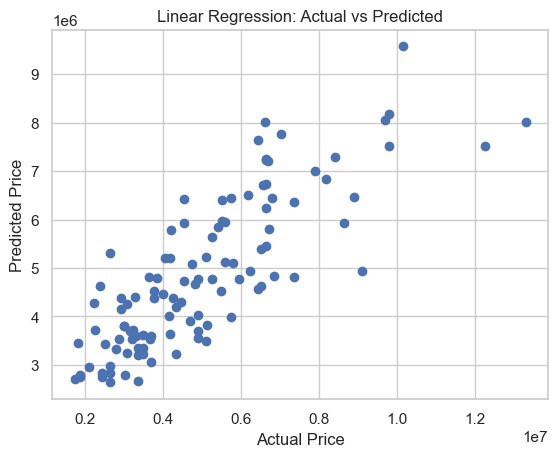

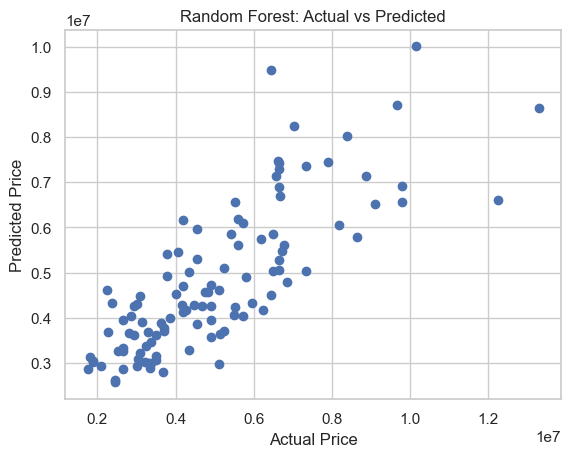

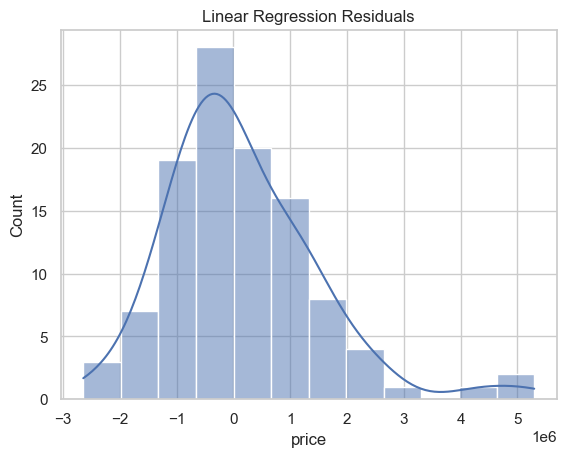

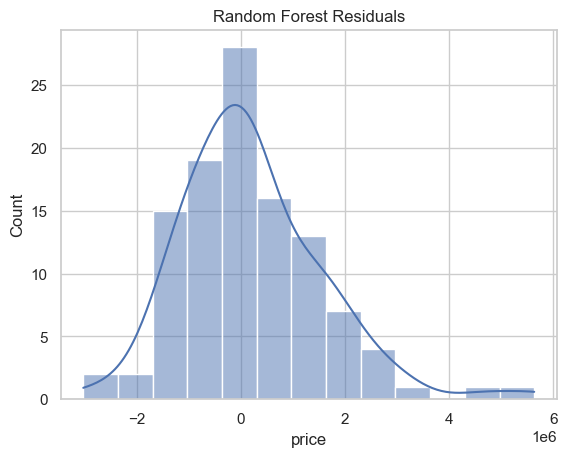

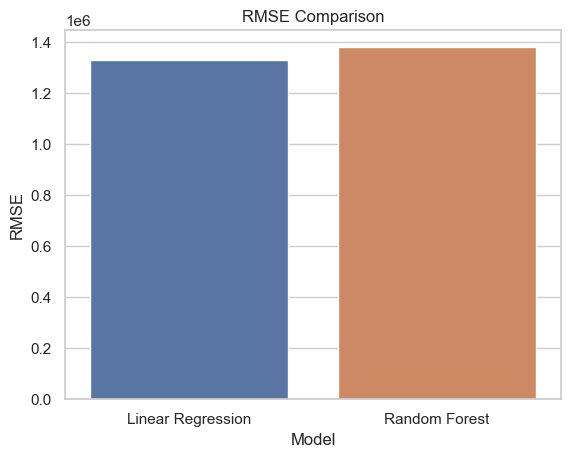

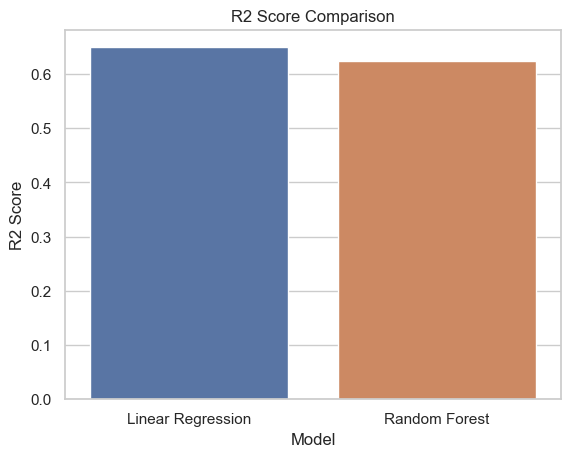

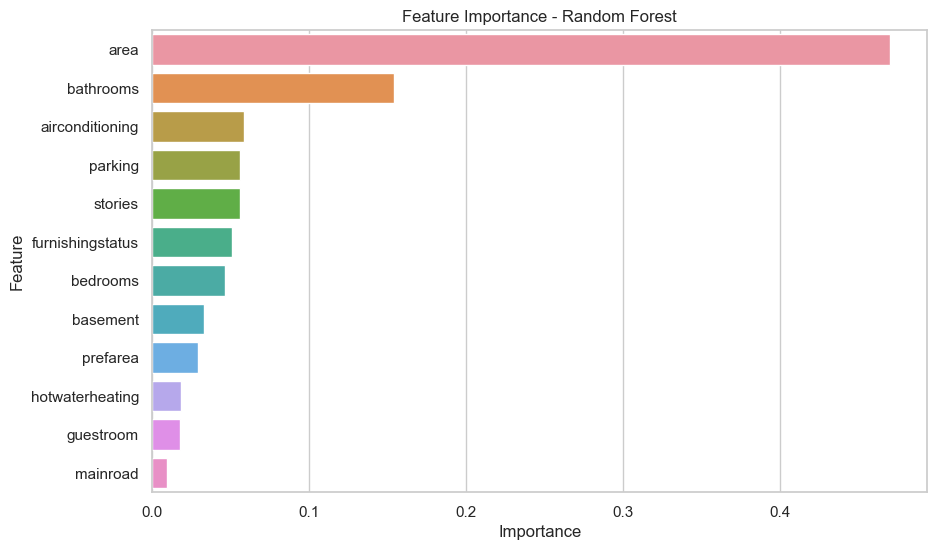


PROJECT EXECUTED SUCCESSFULLY ✅


In [16]:
# 1. LOAD DATA (FILE MUST BE IN SAME FOLDER)
# ============================================
df = pd.read_csv("Housing.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# ============================================
# 2. DATA CLEANING
# ============================================

binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

print("\nMissing values:\n", df.isnull().sum())

# ============================================
# 3. FEATURES & TARGET
# ============================================
X = df.drop('price', axis=1)
y = df['price']

# ============================================
# 4. TRAIN TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 5. SCALING (FOR LINEAR REGRESSION)
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# PROJECT 1: LINEAR REGRESSION
# ============================================
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("\nLINEAR REGRESSION RMSE:", lr_rmse)
print("LINEAR REGRESSION R2:", lr_r2)

# ============================================
# PROJECT 2: RANDOM FOREST
# ============================================
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRANDOM FOREST RMSE:", rf_rmse)
print("RANDOM FOREST R2:", rf_r2)

# ============================================
# COMPARISON TABLE
# ============================================
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2]
})

print("\nMODEL COMPARISON:\n", comparison)

# ============================================
# VISUALIZATIONS
# ============================================

# 1. Actual vs Predicted (Linear Regression)
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# 2. Actual vs Predicted (Random Forest)
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# 3. Residual Distribution
lr_residuals = y_test - y_pred_lr
rf_residuals = y_test - y_pred_rf

plt.figure()
sns.histplot(lr_residuals, kde=True)
plt.title("Linear Regression Residuals")
plt.show()

plt.figure()
sns.histplot(rf_residuals, kde=True)
plt.title("Random Forest Residuals")
plt.show()

# 4. RMSE Comparison
plt.figure()
sns.barplot(x="Model", y="RMSE", data=comparison)
plt.title("RMSE Comparison")
plt.show()

# 5. R2 Comparison
plt.figure()
sns.barplot(x="Model", y="R2 Score", data=comparison)
plt.title("R2 Score Comparison")
plt.show()

# 6. Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.show()

print("\nPROJECT EXECUTED SUCCESSFULLY ✅")


In [17]:
comparison_table = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2],
    "Improvement over Linear Regression (R2)": [0, rf_r2 - lr_r2]
})

print("\n========== MODEL COMPARISON TABLE ==========\n")
print(comparison_table)



========== MODEL COMPARISON TABLE ==========

               Model          RMSE  R2 Score   
0  Linear Regression  1.331071e+06  0.649475  \
1      Random Forest  1.379832e+06  0.623324   

   Improvement over Linear Regression (R2)  
0                                 0.000000  
1                                -0.026152  


In [18]:
comparison_table.to_csv("model_comparison.csv", index=False)
print("Saved as model_comparison.csv")

comparison_table.style.format({
    "RMSE": "{:,.2f}",
    "R2 Score": "{:.4f}",
    "Improvement over Linear Regression (R2)": "{:.4f}"
})


Saved as model_comparison.csv


,Model,RMSE,R2 Score,Improvement over Linear Regression (R2)
0,Linear Regression,"1,331,071.42",0.6495,0.0000
1,Random Forest,"1,379,831.83",0.6233,-0.0262
